#### **POLYNOMIAL REGRESSION**

* What if your data is more complex than a straight line? Surprisingly, you can use a linear model to fit nonlinear data. A simple way to do this is to add powers of each feature as new features, then train a linear model on this extended set of features. This technique is called Polynomial Regression.

* There are two factors when determining model performance: overfitting and underfitting. Overfitting is when the model is too complex and does well on the training data but not on the test data. Underfitting is when the model is too simple and performs poorly on the training and testing data sets.

* To deal with underfitting, we can build a more complex model using methods like polynomial regression.

In [2]:
#!pip install -U scikit-learn
%pip install tqdm
%pip install pandas
%pip install seaborn
%pip install numpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
from tqdm import tqdm

import numpy as np
import pandas as pd
from itertools import accumulate
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits, load_wine

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline

The function below will calculate the $R^{2}$ on each feature given the a input model.

In [4]:
def get_R2_features(model,test=True): 
    #X: global  
    features=list(X)
    features.remove("three")
    
    R_2_train=[]
    R_2_test=[]

    for feature in features:
        model.fit(X_train[[feature]],y_train)
        
        R_2_test.append(model.score(X_test[[feature]],y_test))
        R_2_train.append(model.score(X_train[[feature]],y_train))
        
    plt.bar(features,R_2_train,label="Train")
    plt.bar(features,R_2_test,label="Test")
    plt.xticks(rotation=90)
    plt.ylabel("$R^2$")
    plt.legend()
    plt.show()
    print("Training R^2 mean value {} Testing R^2 mean value {} ".format(str(np.mean(R_2_train)),str(np.mean(R_2_test))) )
    print("Training R^2 max value {} Testing R^2 max value {} ".format(str(np.max(R_2_train)),str(np.max(R_2_test))) )

In [5]:
# The function below will plot the distribution of two inputs.

def  plot_dis(y,yhat):
    
    plt.figure()
    ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
    sns.distplot(yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)
    plt.legend()

    plt.title('Actual vs Fitted Values')
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

##### Reading and understanding our data¶

In [6]:
import pandas as pd

# URL to the dataset
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML240EN-SkillsNetwork/labs/encoded_car_data.csv'

# Load the dataset into a pandas DataFrame
data = pd.read_csv(url)

# Display dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 36 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   diesel       205 non-null    float64
 1   gas          205 non-null    float64
 2   std          205 non-null    float64
 3   turbo        205 non-null    float64
 4   convertible  205 non-null    float64
 5   hardtop      205 non-null    float64
 6   hatchback    205 non-null    float64
 7   sedan        205 non-null    float64
 8   wagon        205 non-null    float64
 9   4wd          205 non-null    float64
 10  fwd          205 non-null    float64
 11  rwd          205 non-null    float64
 12  dohc         205 non-null    float64
 13  dohcv        205 non-null    float64
 14  l            205 non-null    float64
 15  ohc          205 non-null    float64
 16  ohcf         205 non-null    float64
 17  ohcv         205 non-null    float64
 18  rotor        205 non-null    float64
 19  eight   

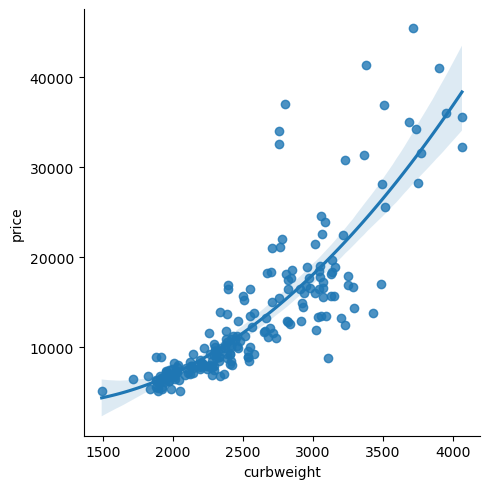

In [7]:
sns.lmplot(x = 'curbweight', y = 'price', data = data, order = 2)

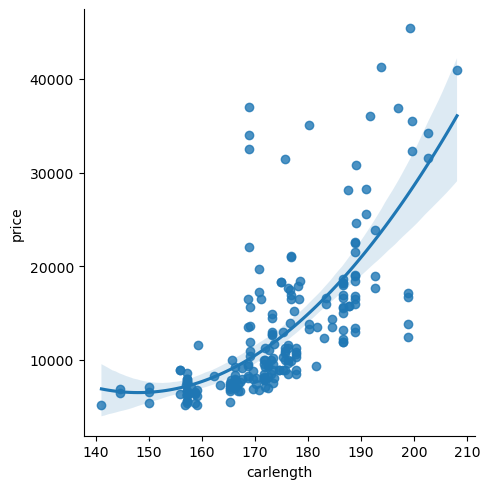

In [8]:
sns.lmplot(x = 'carlength', y = 'price', data = data, order=2)

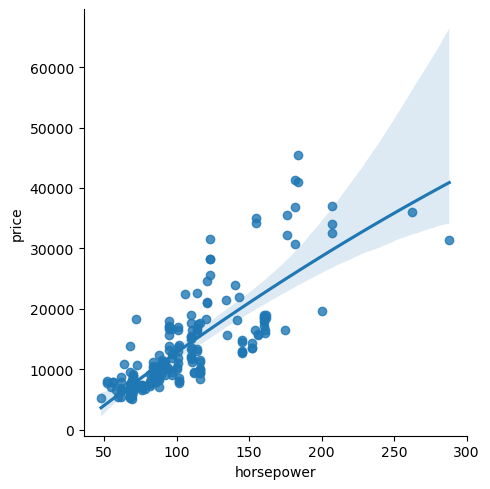

In [9]:
# visualize the relationship between the 'horsepower' and the target variable, 'price'.

sns.lmplot(x = 'horsepower', y = 'price', data = data, order=2)

In [10]:
# split the data into X features and y target.

X = data.drop('price', axis=1)
y = data.price

In [11]:
# split data, using train_test_split function, 
# into the training and testing sets, allocating 30% of the data for testing.

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
print("Number of test samples:", X_test.shape[0])
print("Number of training samples:", X_train.shape[0])

Number of test samples: 62
Number of training samples: 143


In [12]:
# create a linear regression object

lm = LinearRegression()

In [13]:
# fit the model with multiple features on the X_train and y_train data.

lm.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [14]:
# apply predict() function on the testing data set.

predicted = lm.predict(X_test)

In [15]:
# calculate the r2_score() on both, training and testing data sets.

print("R^2 on training  data ",lm.score(X_train, y_train))
print("R^2 on testing data ",lm.score(X_test,y_test))

R^2 on training  data  0.9262722224294516
R^2 on testing data  0.8471124710242095


/var/folders/ls/jfgzf4j13hx__mtdgv2_0xbw0000gn/T/ipykernel_2131/1946811174.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/ls/jfgzf4j13hx__mtdgv2_0xbw0000gn/T/ipykernel_2131/1946811174.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your 

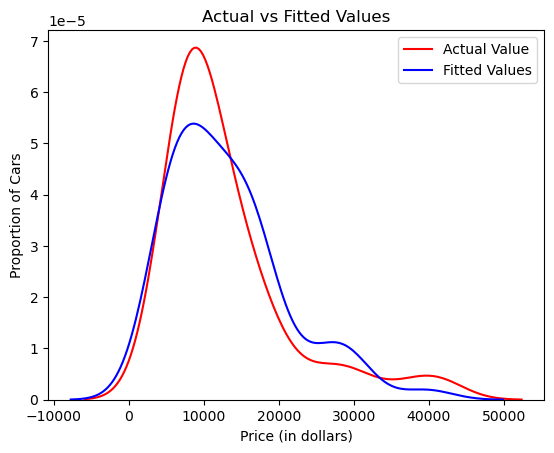

In [16]:
# plot distributions on both, training and testing data sets.

plot_dis(y_test,predicted)

In [17]:
# the estimated coefficients for the linear regression problem.

{col:coef for col,coef in zip(X.columns, lm.coef_)}

{'diesel': 771.2244282057022,
 'gas': -771.2244282037321,
 'std': 304.37444024935974,
 'turbo': -304.37444024912224,
 'convertible': 1786.6475218560959,
 'hardtop': 3165.4520402145395,
 'hatchback': -1770.7658370349016,
 'sedan': -687.6843494294563,
 'wagon': -2493.64937560631,
 '4wd': -605.6774561361445,
 'fwd': -270.9879508474566,
 'rwd': 876.6654069836246,
 'dohc': 2467.0217490535406,
 'dohcv': -13286.459963125038,
 'l': 2148.2366151109777,
 'ohc': 4642.42850084383,
 'ohcf': 6068.751775194061,
 'ohcv': -2819.9527705674745,
 'rotor': 779.9740934900947,
 'eight': 9218.442191789036,
 'five': -2742.7285350001575,
 'four': -5338.369710807768,
 'six': -2146.200321443727,
 'three': -4.547473508864641e-12,
 'twelve': 228.88228197252724,
 'two': 779.9740934900838,
 'wheelbase': 100.45152208631103,
 'curbweight': 4.860501172321306,
 'enginesize': 23.358503747619796,
 'boreratio': -1781.279766309172,
 'horsepower': 68.47693527128617,
 'carlength': -64.49763747266694,
 'carwidth': 579.802880568

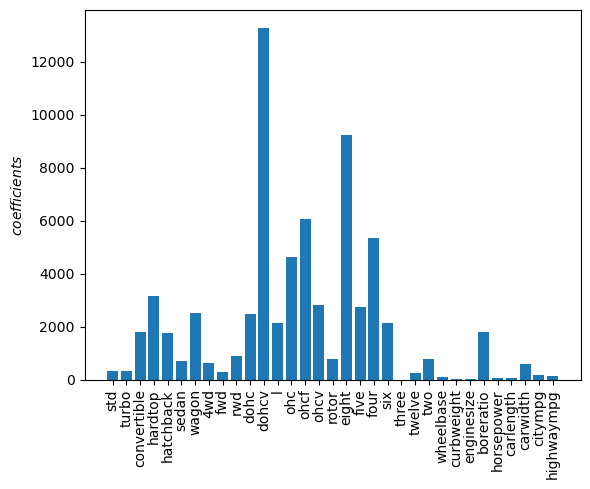

In [18]:
# the first two coefficients are too large to plot, 
# so we'll drop them and plot the rest of the coefficients.

plt.bar(X.columns[2:],abs(lm.coef_[2:]))
plt.xticks(rotation=90)
plt.ylabel("$coefficients$")
plt.show()

##### Individual Features

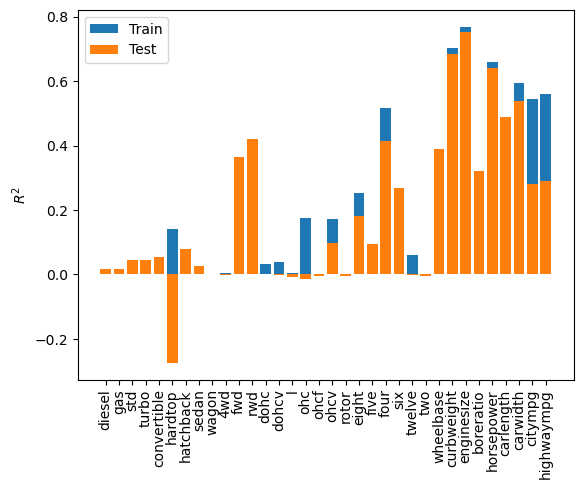

Training R^2 mean value 0.21817773426877918 Testing R^2 mean value 0.1824149303513927 
Training R^2 max value 0.7686929078033782 Testing R^2 max value 0.7534902447506853 


In [19]:
# train the model and plot our $R^2$ for each of the features 
# on the training and testing data sets, using the function.

get_R2_features(lm)

From the above plot, we see that some individual features perform similarly to  using all the features (we removed the feature `three` ), in  addition, we see that smaller coefficients seem to correspond to a larger $R^{2}$, therefore  larger coefficients correspond to overfiting.

* In this case, calculate the $R^2$ using the object Pipeline for  Linear Regression and apply `StandardScaler()` to all features, then use the function `plot_dis` to compare the predicted values versus the actual values.

R^2 on training  data  0.9262722224294516
R^2 on testing data  0.8419174509630336


/var/folders/ls/jfgzf4j13hx__mtdgv2_0xbw0000gn/T/ipykernel_2131/1946811174.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/ls/jfgzf4j13hx__mtdgv2_0xbw0000gn/T/ipykernel_2131/1946811174.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your 

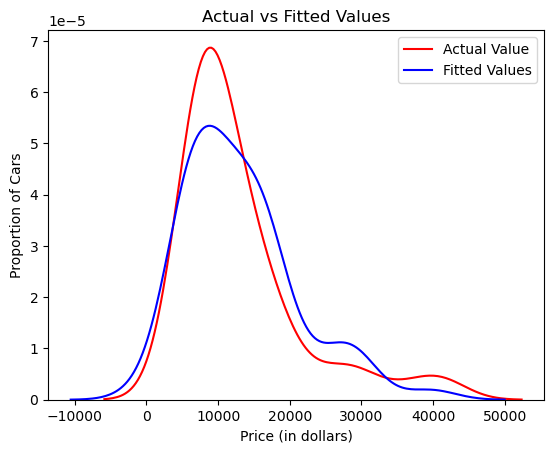

In [20]:
pipe = Pipeline([('ss',StandardScaler() ),('lr', LinearRegression())])
pipe.fit(X_train,y_train)
print("R^2 on training  data ", pipe.score(X_train, y_train))
print("R^2 on testing data ", pipe.score(X_test,y_test))
predicted = pipe.predict(X_test)
plot_dis(y_test,predicted)

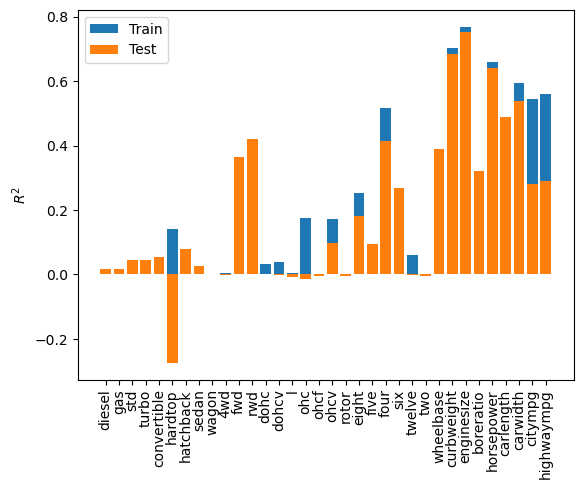

Training R^2 mean value 0.21817773426877918 Testing R^2 mean value 0.18241493035139264 
Training R^2 max value 0.7686929078033781 Testing R^2 max value 0.7534902447506853 


In [21]:
# calculate the $R^2$ using the object Pipeline with StandardScaler 
# for each individual features using the function get_R2_features.

pipe = Pipeline([('ss', StandardScaler() ),('lr', 
LinearRegression())])
get_R2_features(pipe)

#### Polynomial Features

* Multiple Features

Polynomial transform is a simple way to increase the complexity of the model, but we must be mindful of overfilling. Below, we will perform a second degree (degree=2) polynomial transformation

In [22]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [24]:
# transform the training and testing data sets.

X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# X_train_poly and X_test_poly now contain the original features of X 
# plus the square of these features and the cross-terms combination

In [25]:
print(X_test_poly.shape)

(62, 665)


In [27]:
# fit the modelwith newly created polynomial features.

lm = LinearRegression()
lm.fit(X_train_poly, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [28]:
# make predictions.

predicted = lm.predict(X_train_poly)

In [29]:
print("R^2 on training  data ",lm.score(X_train_poly, y_train))
print("R^2 on testing data ",lm.score(X_test_poly,y_test))

R^2 on training  data  0.9985318497975858
R^2 on testing data  -36729.95795012793


the model has a negative on the test data set, this is sign of overfiting.

* Individual Features

Data Pipelines simplify the steps of processing the data. We use the module Pipeline to create a pipeline. We also use PolynomialFeatures as a step in our pipeline.

In [30]:
Input=[ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)), ('model', LinearRegression())]

In [31]:
# repeat the steps above, using the Pipleine object.

pipe=Pipeline(Input)
pipe.fit(X_train, y_train)

,steps,"[('polynomial', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,degree,2
,interaction_only,False
,include_bias,False
,order,'C'
,fit_intercept,True
,copy_X,True
,tol,1e-06


In [32]:
print("R^2 on training  data:", pipe.score(X_train, y_train))
print("R^2 on testing data:", pipe.score(X_test,y_test))

R^2 on training  data: 0.9985318497975858
R^2 on testing data: -36729.95795012793


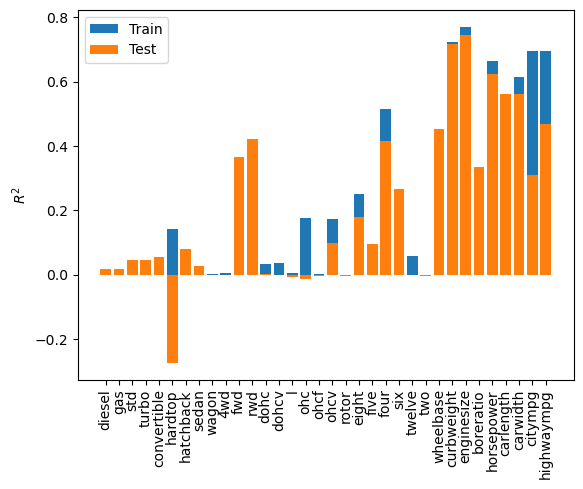

Training R^2 mean value 0.23084141934087032 Testing R^2 mean value 0.19386255223850482 
Training R^2 max value 0.7706959974452947 Testing R^2 max value 0.7463370080614307 


In [33]:
get_R2_features(pipe)

Feature with the max is higher than when using all the features.

#### GRID SEARCH PIPELINE

* define a pipeline object, then use GridSearch to find the best hyper-parameters of the model by using cross-validation method of the parameter grid.  A 5-fold cross validation is used by default.

In [34]:
# create PolynomialFeatures() pipeline.

Input=[ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)), ('scaler', StandardScaler()),('model',LinearRegression() )]
pipe=Pipeline(Input)

* search for the best combination of hyperparameters, we create a GridSearchCV object with dictionary of parameter values. The parameters of pipelines can be set using the name of the key separated by '__', then the parameter name of the key.

In [36]:
param_grid = {
    "polynomial__degree": [1, 2, 3],
 
    
}

# polynomial__degree: is the degree of the polynomial.

In [37]:
search = GridSearchCV(pipe, param_grid, n_jobs=1)

In [38]:
pipe.fit(X_train, y_train)

,steps,"[('polynomial', ...), ('scaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,degree,2
,interaction_only,False
,include_bias,False
,order,'C'
,copy,True
,with_mean,True
,with_std,True


In [39]:
search.fit(X_test,y_test)

,estimator,Pipeline(step...egression())])
,param_grid,"{'polynomial__degree': [1, 2, ...]}"
,scoring,None
,n_jobs,1
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,degree,1


In [41]:
# The object finds the best parameter values on the validation data.
# We can obtain the estimator with the best parameters and assign it 
# to the variable best, as follows:

best = search.best_estimator_
best

,steps,"[('polynomial', ...), ('scaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,degree,1
,interaction_only,False
,include_bias,False
,order,'C'
,copy,True
,with_mean,True
,with_std,True


In [42]:
# we test our model on the test data to see the best score.

best.score(X_test, y_test)

0.9681812255199611

/var/folders/ls/jfgzf4j13hx__mtdgv2_0xbw0000gn/T/ipykernel_2131/1946811174.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/ls/jfgzf4j13hx__mtdgv2_0xbw0000gn/T/ipykernel_2131/1946811174.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your 

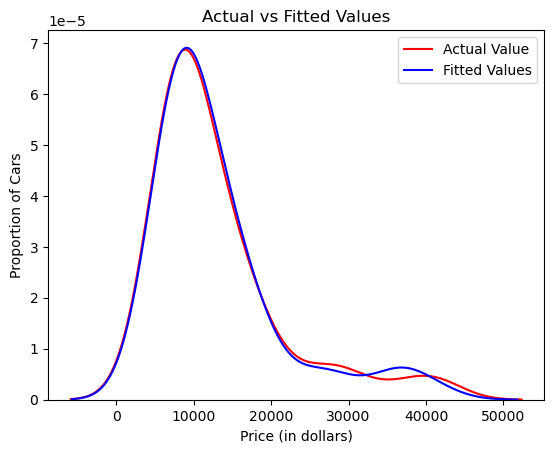

In [43]:
# plot the predicted values against the actual values.
predicted = best.predict(X_test)
plot_dis(y_test, predicted)

calculate the $R^2$ using the object `Pipeline` with `GridSearch` for each individual features.

diesel
gas
std
turbo
convertible
hardtop
hatchback
sedan
wagon
4wd
fwd
rwd
dohc
dohcv
l
ohc
ohcf
ohcv
rotor
eight
five
four
six
three
twelve
two
wheelbase
curbweight
enginesize
boreratio
horsepower
carlength
carwidth
citympg
highwaympg


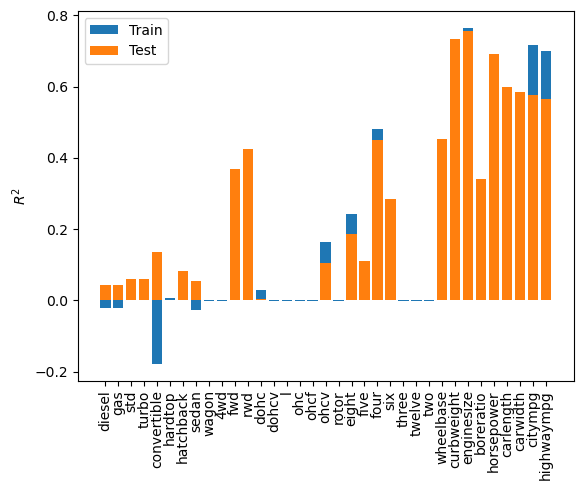

Training R^2 mean value 0.18703320595427506 Testing R^2 mean value 0.22042180897456976 
Training R^2 max value 0.765323637379124 Testing R^2 max value 0.7565151400968062 


In [45]:
features=list(X)


R_2_train=[]
R_2_test=[]

for feature in features:
    param_grid = {
    "polynomial__degree": [1, 2,3,4,5],
    "model__positive":[True, False]}
    Input=[ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)), ('model',LinearRegression())]
    pipe=Pipeline(Input)
    print(feature)
    search = GridSearchCV(pipe, param_grid, n_jobs=2)
    search.fit(X_test[[feature]], y_test)
    best=search.best_estimator_

    R_2_test.append(best.score(X_test[[feature]],y_test))
    R_2_train.append(best.score(X_train[[feature]],y_train))


plt.bar(features,R_2_train,label="Train")
plt.bar(features,R_2_test,label="Test")
plt.xticks(rotation=90)
plt.ylabel("$R^2$")
plt.legend()
plt.show()
print("Training R^2 mean value {} Testing R^2 mean value {} ".format(str(np.mean(R_2_train)),str(np.mean(R_2_test))) )
print("Training R^2 max value {} Testing R^2 max value {} ".format(str(np.max(R_2_train)),str(np.max(R_2_test))) )